### 데이터 로딩

#### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore", UserWarning)

##### matplotlib이랑 matplotlib.pyplot을 따로 불러오는 이유가 뭘까?

- plt만 사용하기 때문에 matplotlib만 불러올 필요는 없는 것 같다. plt.plot형태만 사용하므로 matplotlib은 주석처리했다.
- 출처: https://stackoverflow.com/questions/36661876/what-is-the-difference-between-importing-matplotlib-and-matplotlib-pyplot

#### 데이터 불러오기

In [2]:
train_df = pd.read_csv('/aiffel/data/train.csv')
test_df = pd.read_csv('/aiffel/data/test.csv')

In [3]:
train_df0 = train_df.copy()

### 데이터 확인

In [4]:
print('+++++++++++++++++++++++++++++++')
print('Train size:', train_df.shape)
print('Test size:', test_df.shape)
print('-------------------------------')
print('Train columns :', train_df.columns.values)
print('Test columns :', test_df.columns.values )
print('+++++++++++++++++++++++++++++++')

+++++++++++++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 11)
-------------------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
+++++++++++++++++++++++++++++++


##### 데이터 사이즈를 확인하고 컬럼명을 확인한 뒤 컬럼의 상세 의미를 찾아봤다.

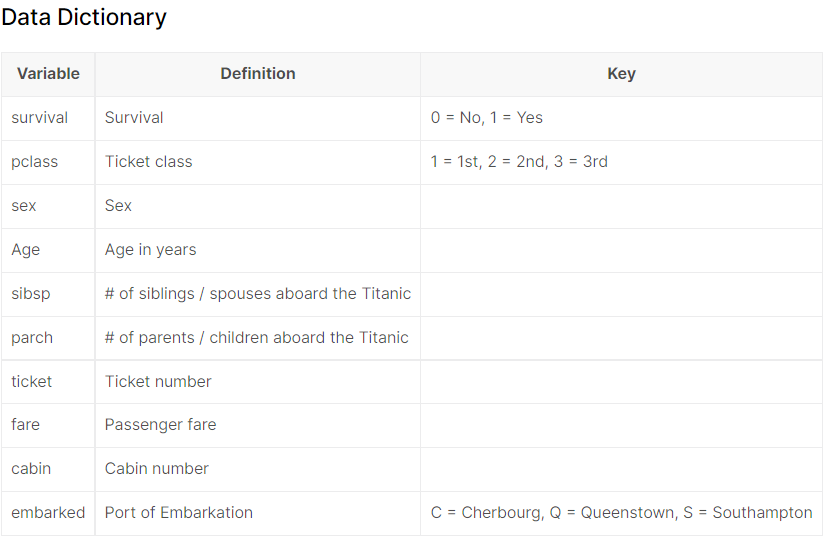

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Age, Cabin, Embarked에 결측치가 있다. 결측치를 시각화해보자.

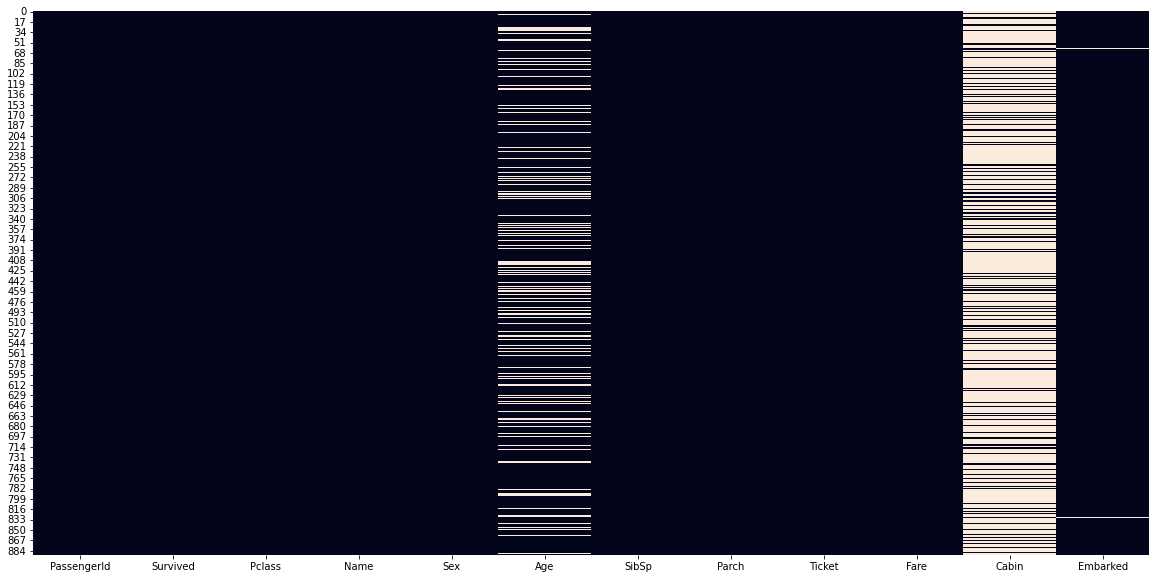

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.isnull(), cbar = False)
plt.show()

출처: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=youji4ever&logNo=221623491491

##### cbar = False로 하면 오른쪽에 기본으로 나타나는 bar가 없어진다.

##### Cabin에는 결측치가 꽤 많다는 것을 직관적으로 볼 수 있다. Embarked는 플롯 사이즈를 작게 설정하면 결측치가 잘 안 보인다.

##### missingno를 설치해서 다시 결측치를 확인해봤다.

<AxesSubplot:>

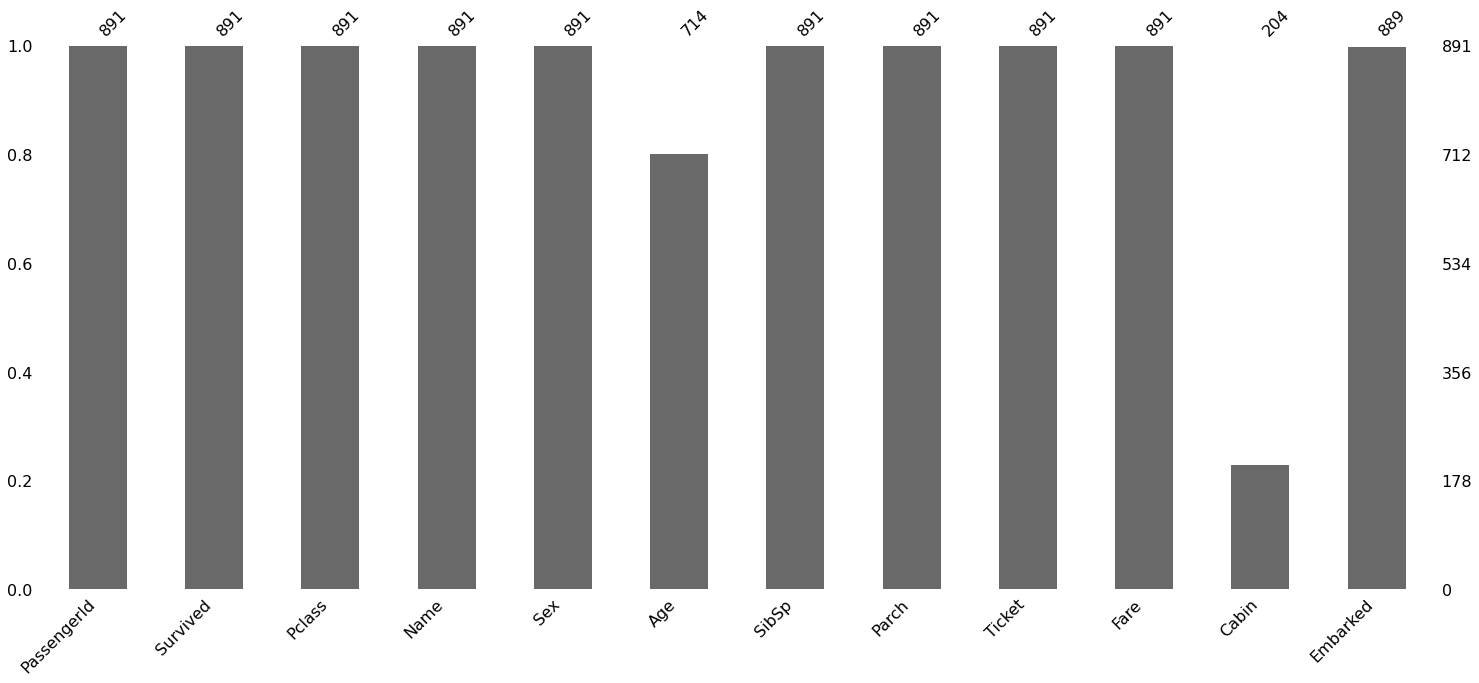

In [8]:
import missingno as msno
msno.bar(train_df)

##### missingno에서 bar를 이용하면 Age와 Cabin은 확실히 눈에 보이지만 Embarked는 별로 눈에 보이지 않는다. 그래서 matrix를 이용해보기로 했다.

<AxesSubplot:>

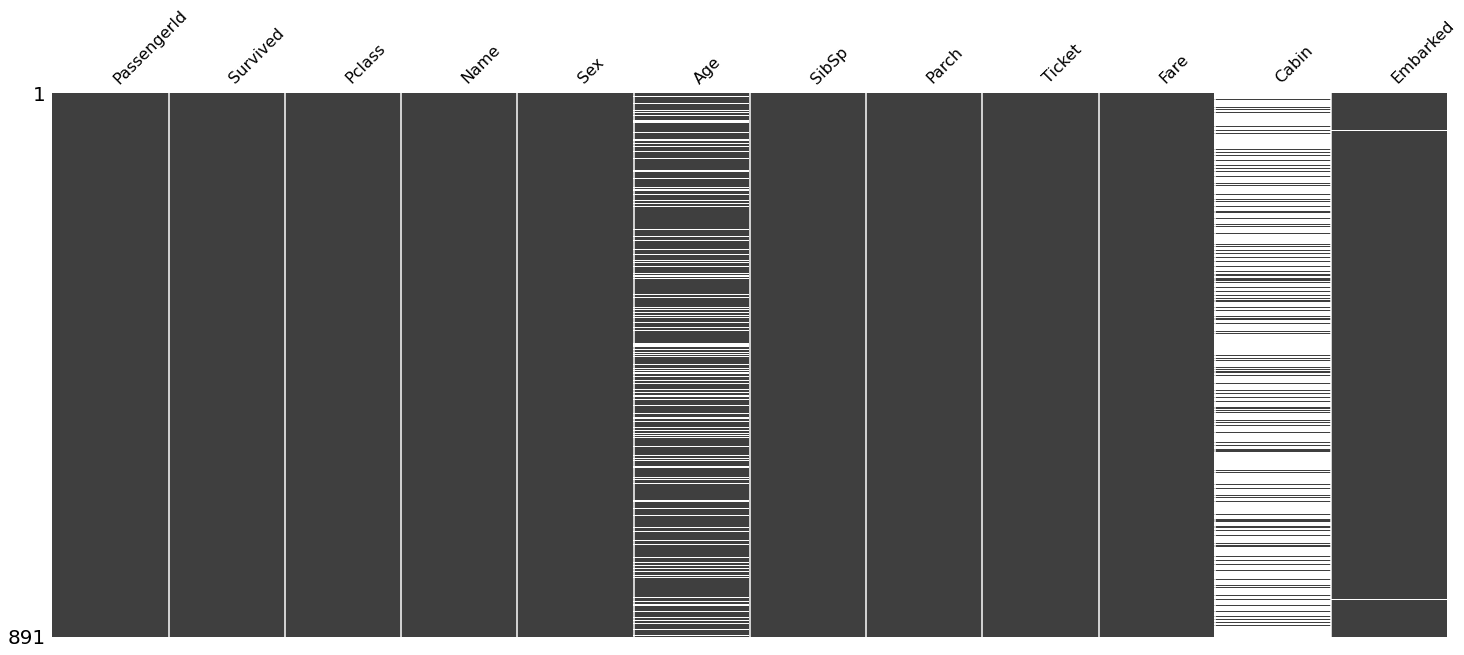

In [9]:
msno.matrix(train_df, sparkline = False)

##### sparkline = False를 지정하지 않으면 나오는 선은 데이터가 얼마나 완전한 지를 포괄적인 형태로 요약해주고 데이터셋에서의 최대 최소 결측치가 포함된 가로축을 가리킨다.

출처: https://github.com/ResidentMario/missingno

### 데이터 전처리

##### 선실 종류에 따라 생존률이 다르다고 들어서 cabin을 이용하고 싶었지만 결측치가 너무 많아서 이용하기 어려울 것 같다. 하지만 pclass를 보면 1,2,3 등급을 알 수 있어서 퍼스트 클래스일수록 좋은 선실에 있었다고 가정하고 cabin을 버리기로 했다. Fare도 pclass로 구분 가능할 것 같아서 버리기로 했고, passengerId와 Name은 생존여부와 무관한 것 같아서 우선 버리기로 했다. 밤에 일어난 사고니까 다들 자기 객실에 있었을 것이라고 가정했다.

#### 변수 제거

In [10]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
test_df = test_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


##### Embarked의 결측치는 2개밖에 없어서 최빈값으로 채워주기로 했다.

In [12]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


##### Age의 최솟값은 0.42로 확인됐다. Age의 결측치를 0으로 채워주자.

#### 결측치 채우기

In [13]:
train_df['Age'] = train_df['Age'].fillna(0)
test_df['Age'] = test_df['Age'].fillna(0)

In [14]:
print('The most frequent value:',train_df['Embarked'].mode()[0])
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])


The most frequent value: S


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [16]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


#### 변수 변환

In [17]:
train_df["Sex"] = train_df["Sex"].astype('category')
train_df["Sex"] = train_df["Sex"].cat.codes

test_df["Sex"] = test_df["Sex"].astype('category')
test_df["Sex"] = test_df["Sex"].cat.codes

In [18]:
train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes

test_df["Embarked"] = test_df["Embarked"].astype('category')
test_df["Embarked"] = test_df["Embarked"].cat.codes

In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


- Survived 0: 죽었다
- Survived 1: 살았다


- Sex 0: 여자
- Sex 1: 남자


- Embarked 0: Q
- Embarked 1: C
- Embarked 2: S

### 데이터 탐색 및 시각화

#### 데이터 통계량 탐색

In [20]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


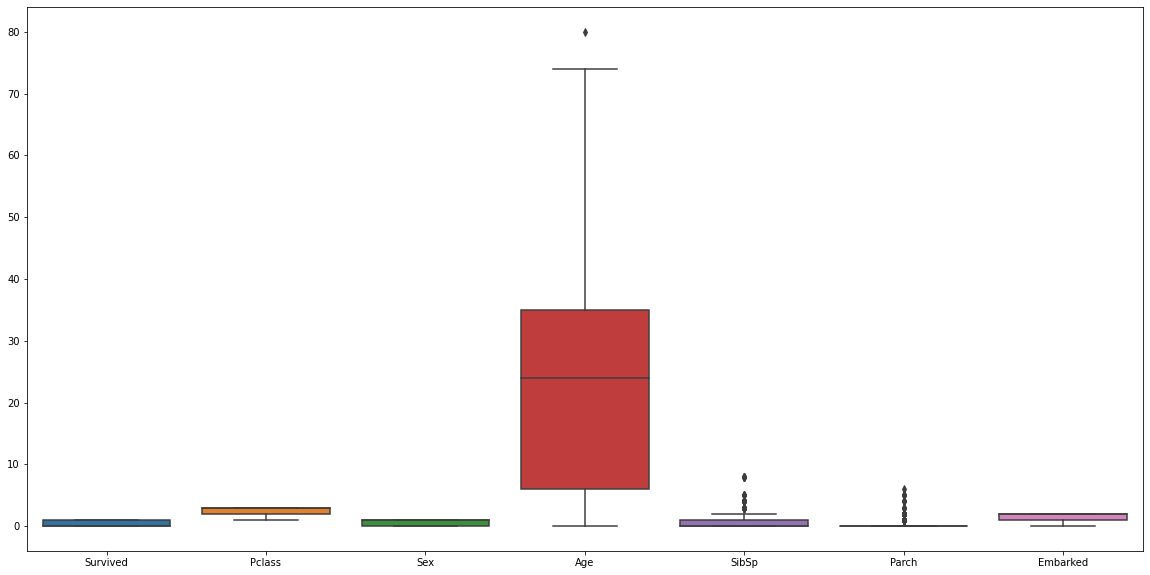

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df)
plt.show()

##### plt.show()를 하면 줄글이 나오지 않는다는 것을 알았다.

출처: https://agronomy4future.org/?p=11677

##### MinMaxScaler로 그래프를 다시 그려보자.

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaler.fit(train_df)
train_df_scaled = scaler.transform(train_df)
train_df_scaled = pd.DataFrame(train_df_scaled, columns=train_df.columns) 
print(train_df_scaled)

     Survived  Pclass  Sex     Age  SibSp     Parch  Embarked
0         0.0     1.0  1.0  0.2750  0.125  0.000000       1.0
1         1.0     0.0  0.0  0.4750  0.125  0.000000       0.0
2         1.0     1.0  0.0  0.3250  0.000  0.000000       1.0
3         1.0     0.0  0.0  0.4375  0.125  0.000000       1.0
4         0.0     1.0  1.0  0.4375  0.000  0.000000       1.0
..        ...     ...  ...     ...    ...       ...       ...
886       0.0     0.5  1.0  0.3375  0.000  0.000000       1.0
887       1.0     0.0  0.0  0.2375  0.000  0.000000       1.0
888       0.0     1.0  0.0  0.0000  0.125  0.333333       1.0
889       1.0     0.0  1.0  0.3250  0.000  0.000000       0.0
890       0.0     1.0  1.0  0.4000  0.000  0.000000       0.5

[891 rows x 7 columns]


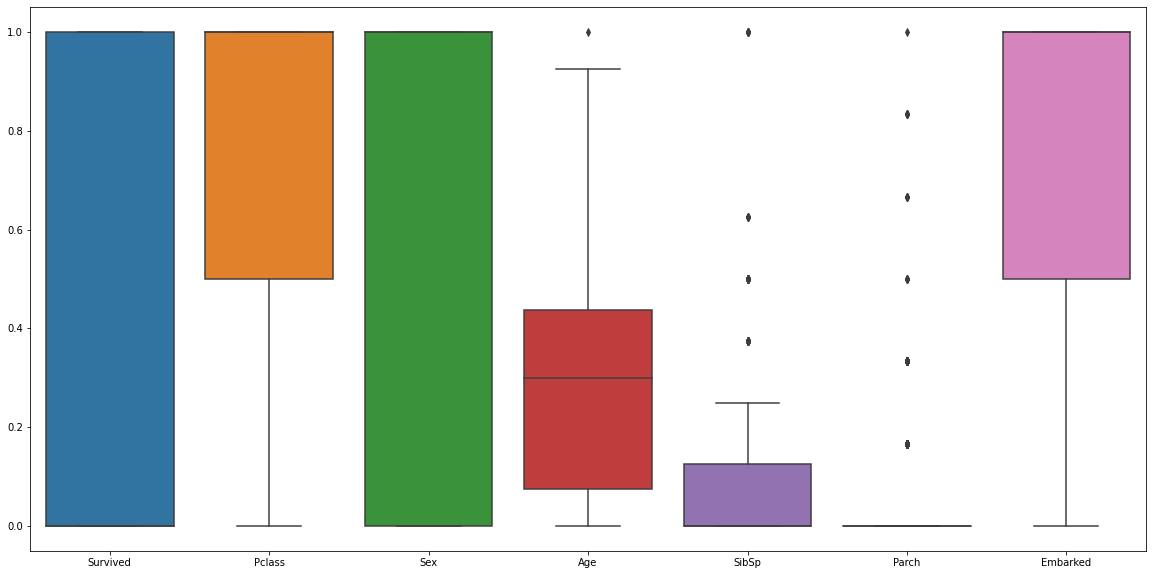

In [24]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df_scaled)
plt.show()

##### 이상치를 확인하고 싶었던 거라서 standardscaler가 더 좋을 것 같다.

출처: https://wpaud16.tistory.com/67

In [25]:
standard = StandardScaler()
temp = train_df['Survived']

standard.fit(train_df)
train_standard = standard.transform(train_df) 
train_standard = pd.DataFrame(train_standard, columns=train_df.columns)
train_standard = train_standard.drop('Survived', axis = 1)
train_standard['Survived'] = temp

##### target까지 스케일링 해버리면 나중에 자료형 오류가 난다.

In [26]:
standard.fit(test_df)
test_standard = standard.transform(test_df) 
test_standard = pd.DataFrame(test_standard, columns=test_df.columns)

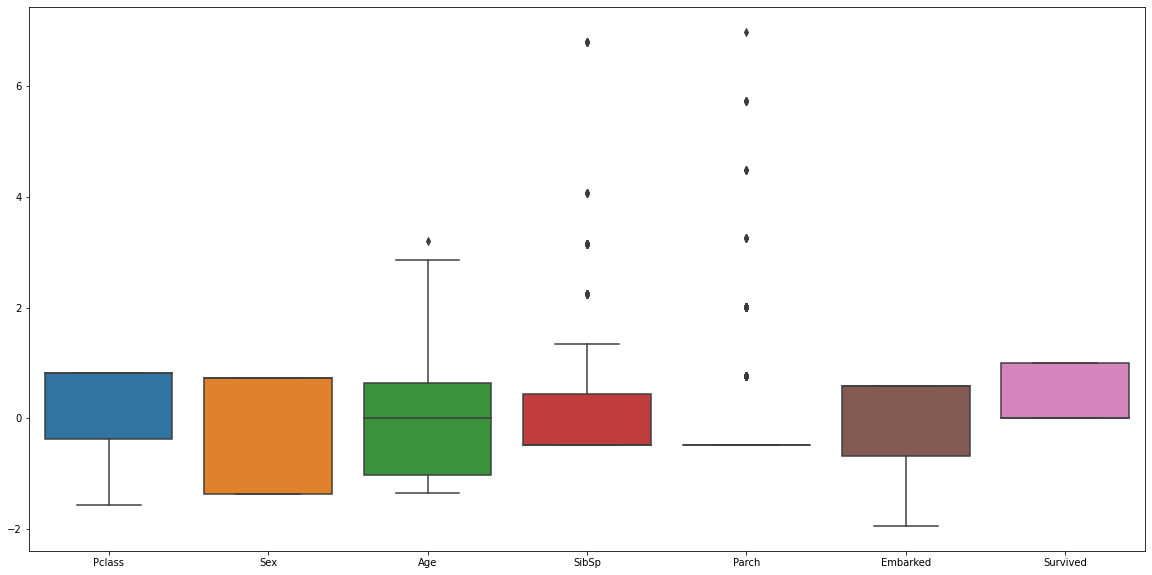

In [27]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_standard)
plt.show()

#### Label과의 연관성

In [28]:
for i in range(1,train_df.shape[1]):
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009


#### 각 변수들의 분포도

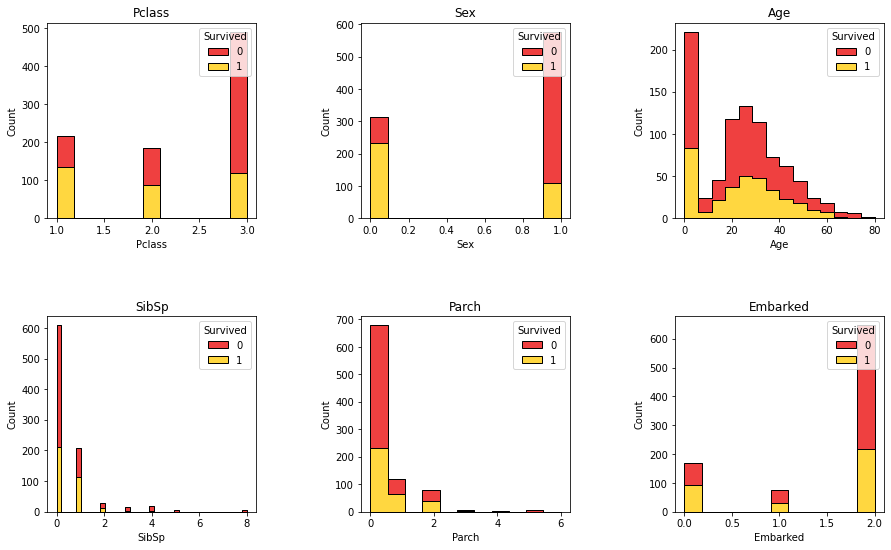

In [29]:
col_name = train_df.columns[1:]

fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')

fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='hot',
                 multiple="stack",ax=axs[i], element="step")
    axs[i].set_title(col_name[i])
plt.show()

##### 3등칸에 탄 사람일수록 많이 죽었다. 여자일수록 많이 살았다. 20~40대는 생존률이 낮다. sibsp와 parch, embarked로는 관계성을 찾기 힘들어보인다.

<Figure size 648x648 with 0 Axes>

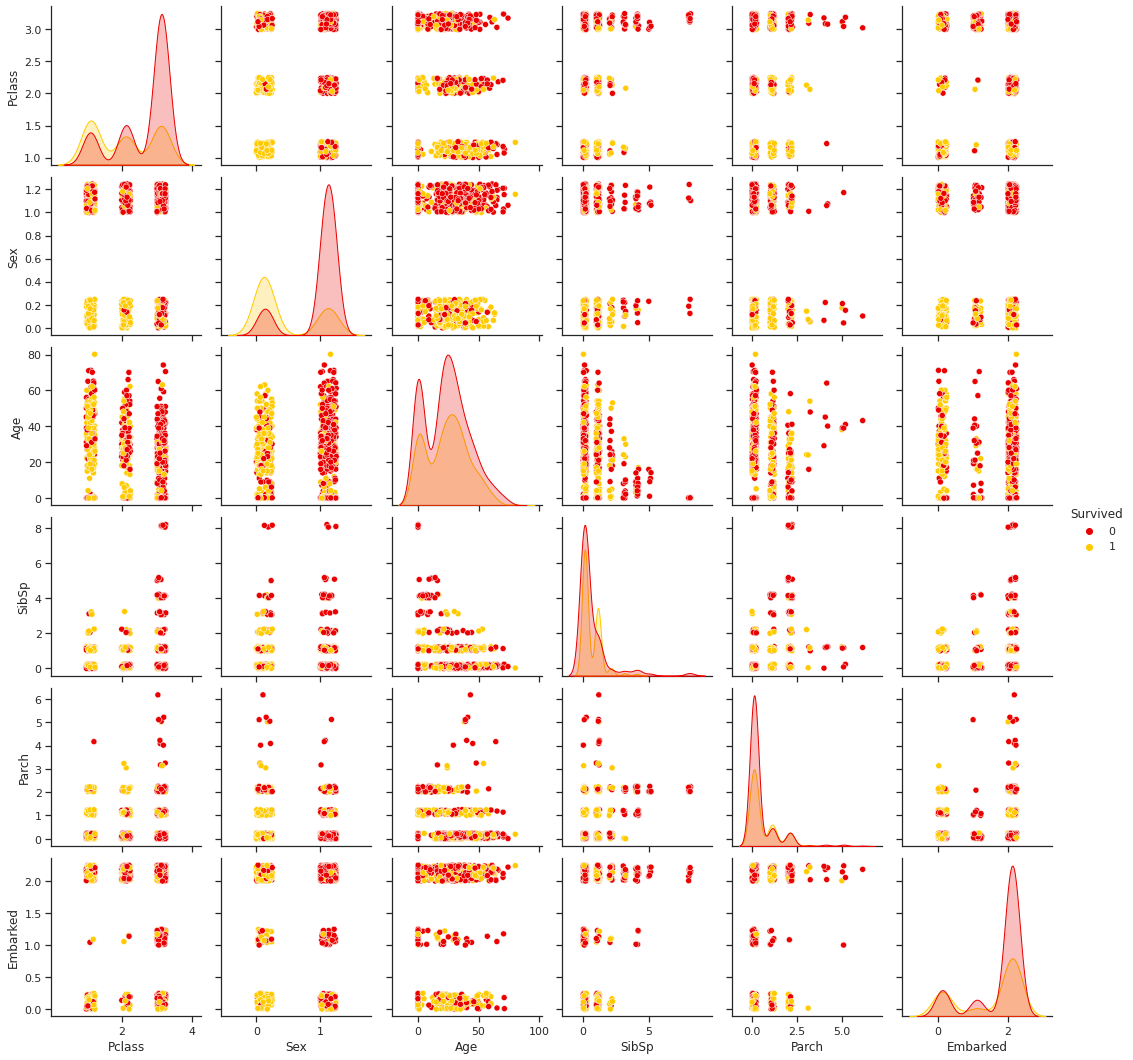

In [30]:
train_df_rand = train_df.copy()

plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
                  columns=train_df.iloc[:,1:].columns)/400
train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand
sns.set(style="ticks")
sns.pairplot(train_df_rand,hue='Survived',palette='hot')
plt.show()

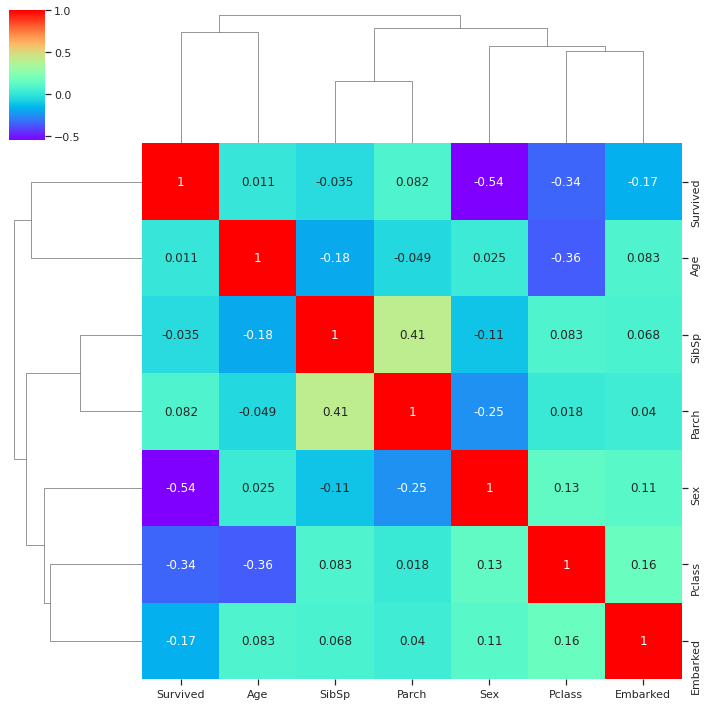

In [31]:
corr = train_df.corr()
sns.clustermap(corr,annot = True, cmap = 'rainbow')
plt.show()

##### SibSp, Parch, Age는 상관계수가 낮아서 관련이 없는 것으로 확인했다.

In [32]:
train_standard = train_standard.drop(['SibSp', 'Parch', 'Age'], axis=1)
test_standard = test_standard.drop(['SibSp', 'Parch', 'Age'], axis=1)

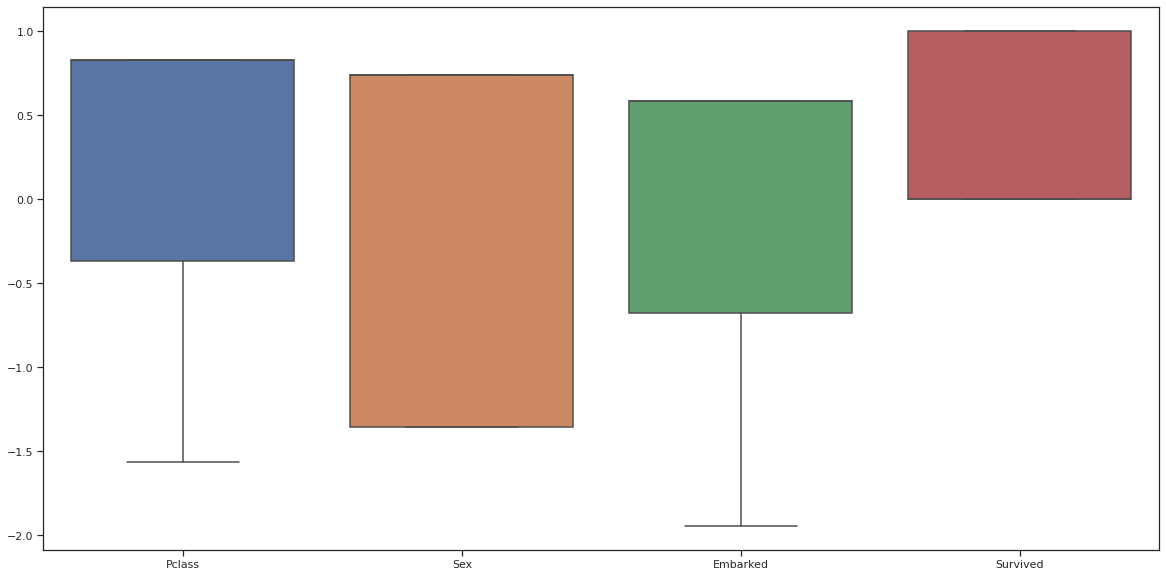

In [33]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_standard)
plt.show()

### 모델링

#### train/test 데이터 준비

In [34]:
X_train = train_df_rand.drop(['Survived', 'SibSp', 'Parch', 'Age'], axis=1)
X_test = test_df.drop(['SibSp', 'Parch', 'Age'], axis=1)
y_train = train_df['Survived']
print(X_train.shape,y_train.shape)
print(X_test.shape)

(891, 3) (891,)
(418, 3)


In [35]:
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
                  columns=train_df.iloc[:,1:].columns)/800
s_rand = rand.copy()
standard.fit(s_rand)
s_X_train = s_rand.drop(['SibSp', 'Parch', 'Age'], axis=1)
s_X_test = test_standard
s_y_train = train_standard['Survived']
print(s_X_train.shape,s_y_train.shape)
print(s_X_test.shape)

(891, 3) (891,)
(418, 3)


##### 노이즈를 넣어줬다.

#### Cross validation + Model evaluation

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [37]:
def kfold(X_train,y_train,clf):
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
    global X_tra, X_val, y_tra, y_val, y_pred
    for tra_index, val_index in kf.split(X_train):
        X_tra, X_val = X_train.iloc[tra_index,:], X_train.iloc[val_index,:]
        y_tra, y_val = y_train.iloc[tra_index], y_train.iloc[val_index]
        
        clf.fit(X_tra, y_tra) 
        
        y_pred = clf.predict(X_val) 
        clf_score.append(clf.score(X_tra,y_tra))
    print("Score:", np.mean(clf_score))

##### 데이터프레임 형식이 아니라 .values를 찍어서 가져와야 오류가 나지 않는다고 해서 출처에서처럼 fit할 때만 values를 했었는데, 그 뒤로 경고문구가 더 많이 생겼다. 그래서 .values를 찍을 수 있는 곳에는 다 찍었다. 그럼에도 불구하고 맨 마지막에 RandomForestClassifier에서 경고 문구가 딱 하나 출력되었기 때문에 경고문을 무시하는 라이브러리를 가져와야 했다.
출처: https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

In [38]:
models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors = 3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train,y_train,clf) 


y_predict = clf.predict(X_test)

model: SVC(gamma='auto')
Score: 0.8114502734134927
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.8535382227335045
model: SGDClassifier(max_iter=100)
Score: 0.7272948610870353
model: SGDClassifier()
Score: 0.774684038009991
model: LogisticRegression()
Score: 0.7904049198669966
model: DecisionTreeClassifier(max_depth=10)
Score: 0.9407984934680178
model: RandomForestClassifier()
Score: 1.0


##### RandomForestClassifier()를 사용해서 1.0이 나왔다. ROC-AUC를 확인해보자.

#### ROC-AUC 확인하기

AUC: 0.9901932084309133


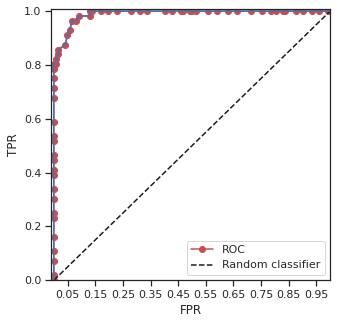

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_tra,y_tra)
pred_proba_class1 = clf.predict_proba(X_val)[:,1]

plt.figure(figsize=(5,5))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(y_pred, pred_proba_class1)    

print("AUC:",roc_auc_score(y_pred,pred_proba_class1))
fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1)
plt.plot(fprs,tprs)
plt.show()

##### 랜덤포레스트로 ROC-AUC를 구해봤다. 데이터의 양이 너무 적어서 직각에 가까운 곡선 아닌 곡선이 나왔었다. 노이즈를 추가해서 부드러운 곡선으로 바꿨다.

출처: https://www.quora.com/What-does-it-mean-when-an-ROC-curve-is-not-smooth

--------------------

##### 스케일러를 적용한 모델링도 해봤다.

In [40]:
def kfold(s_X_train,s_y_train,clf):
    clf_score = []
    kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
    global s_X_tra, s_X_val, s_y_tra, s_y_val, s_y_pred
    for tra_index, val_index in kf.split(s_X_train.values):
        s_X_tra, s_X_val = s_X_train.iloc[tra_index,:], s_X_train.iloc[val_index,:]
        s_y_tra, s_y_val = s_y_train.iloc[tra_index], s_y_train.iloc[val_index]
        

        s_y_val = s_y_val.values
        clf.fit(s_X_tra.values, s_y_tra.values) 
        
        s_y_pred = clf.predict(s_X_val.values) 
        clf_score.append(clf.score(s_X_tra.values,s_y_tra.values))
    print("Score:", np.mean(clf_score))

In [41]:
models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors = 3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(s_X_train,s_y_train,clf) 


s_y_predict = clf.predict(s_X_test)

model: SVC(gamma='auto')
Score: 0.6161652772743749
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.7831078525615771
model: SGDClassifier(max_iter=100)
Score: 0.5698819673164506
model: SGDClassifier()
Score: 0.5738090360401532
model: LogisticRegression()
Score: 0.6161652772743749
model: DecisionTreeClassifier(max_depth=10)
Score: 0.8209799549301101
model: RandomForestClassifier()
Score: 1.0


#### ROC-AUC 확인하기

AUC: 0.9497282608695653


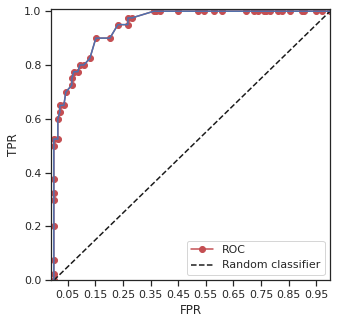

In [42]:
# clf = SVC(gamma='auto', probability = True)
# clf = SGDClassifier(max_iter=100, loss = 'log')
# clf = SGDClassifier(loss = 'log')
# clf = KNeighborsClassifier(n_neighbors=500)
# clf = LogisticRegression()
# clf = DecisionTreeClassifier(max_depth=10)
clf = RandomForestClassifier()

clf.fit(s_X_tra,s_y_tra)
pred_proba_class1 = clf.predict_proba(s_X_val)[:,1]
plt.figure(figsize=(5,5))

def roc_curve_plot(y_pred, y_val):
    fprs, tprs, thresholds = roc_curve(y_pred, pred_proba_class1)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    
roc_curve_plot(s_y_pred, pred_proba_class1)
fprs, tprs, thresholds = roc_curve(s_y_pred, pred_proba_class1)
plt.plot(fprs,tprs)
print("AUC:",roc_auc_score(s_y_pred,pred_proba_class1))

##### 오류가 나는 모델들이 있어서 공식 홈페이지에 가서 파라미터를 확인하고 추가해줬다.

##### 노이즈를 얼마나 넣느냐에 따라 스케일링한 AUC가 더 증가하기도 하고 감소하기도 한다.

##### AUC 값이 이상했다. roc_curve_plot(s_y_pred, pred_proba_class1)로 바꾸니까 됐다. 인자를 주의하기

출처: knn https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-2-k-%EC%B5%9C%EA%B7%BC%EC%A0%91-%EC%9D%B4%EC%9B%83/

----------

# 참고문헌

https://stackoverflow.com/questions/36661876/what-is-the-difference-between-importing-matplotlib-and-matplotlib-pyplot


https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=youji4ever&logNo=221623491491


https://github.com/ResidentMario/missingno


https://agronomy4future.org/?p=11677


https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0


https://www.quora.com/What-does-it-mean-when-an-ROC-curve-is-not-smooth


https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-2-k-%EC%B5%9C%EA%B7%BC%EC%A0%91-%EC%9D%B4%EC%9B%83/

----------

# 회고

## 어려웠던 점

- ### AUC 값도 이상하고 그래프 모양도 이상했다.

## 해결을 위해 시도한 방법
- ### roc_curve_plot(s_y_pred, pred_proba_class1)
- ### 원래는 pred_proba_class1 자리에 s_y_val이 들어가있었다.

## 문제 해결에 성공한 이유
- ### 인자를 변경했기 때문

## 알아낸 점

### 1. matplotlib이랑 matplotlib.pyplot을 따로 불러오는 이유가 뭘까?
### - matplotlib만 불러왔을 때 pyplot을 사용하고 싶으면 mlp.plot.plot(...), matplotlib.pyplot을 불러오면 plt.plot(...)으로 사용하면 되고 이 프로젝트에서는 plt만 사용하기 때문에 matplotlib을 전체를 다 불러올 필요는 없었던 것 같다.

### 2. heatmap에서 cbar = False로 하면 오른쪽에 기본으로 나타나는 bar가 없어진다.

### 3. MISSINGNO 라이브러리의 존재를 알았다.

### 4. Missingno의 matrix를 이용하면 오른쪽에 나타나는 sparkline은 False로 설정하면 사라진다.

### 5. plt.show()를 하면 자료형 설명 없이 딱 그래프만 보여준다.

### 6. 처음에 했던 ROC-AUC 그래프가 너무 직각에 가깝게 나왔는데, 데이터 양이 부족해서 그렇다고 했다. 노이즈를 추가해주면 곡선에 가깝게 나오는 것을 알았다.

### 7. AUC를 구할 때 어떤 모델들은 구할 수 없었다. 공식 홈페이지에서 파라미터를 확인하고 추가한 뒤에는 에러나지 않고 구해졌다.

### 8. 노이즈를 얼마나 넣느냐에 따라 AUC가 더 증가하기도 하고 감소하기도 한다.

## 모호한점

### 1. 모델을 평가하다가 경고문구가 나왔었는데, 데이터프레임이라서 자료형이 맞지 않아서 경고를 해줬던 것이다. .values를 이용해서 자료형을 fit할때만 바꿔줬더니 오히려 경고가 더 많이 나와서, 의심가는 모든 곳들에 .values를 붙여줬다. 그랬더니 경고문구가 딱 하나만 나오고 더 이상 나오지 않았다. 왜 그 경고문구 하나는 사라지지 않는 걸까?
### 2. 아직 train test에서 파생되는 개념들을 잘 모른다.

## 느낀점

### 1. 이상치가 얼마나 멀리 떨어져있는지를 확인하고 싶을 때는 STANDARDSCLAER를 사용하면 좋다.

### 2. target까지 스케일링 해버리면 나중에 자료형 오류가 날 수 있다.

### 3. 기록하는 습관을 가져야겠다.